In [ ]:
import pandas as pd

df = pd.read_csv('performance_results.csv')
df.head()

,Matrix Size (n),Function,Iteration,Execution Time (seconds)
0,1024,C Function,1,0.002
1,1024,C Function,2,0.002
2,1024,C Function,3,0.003
3,1024,C Function,4,0.002
4,1024,C Function,5,0.002


In [2]:
df_grouped = df.groupby(['Matrix Size (n)', ' Function'], as_index=False)[' Execution Time (seconds)'].mean()
df_grouped

,Matrix Size (n),Function,Execution Time (seconds)
0,1024,C Function,0.002067
1,1024,XMM,0.000133
2,1024,YMM,0.000100
3,1024,non-SIMD,0.000367
4,8192,C Function,0.129167
5,8192,XMM,0.011867
6,8192,YMM,0.010067
7,8192,non-SIMD,0.020633
8,32768,C Function,2.066900
9,32768,XMM,0.189433


In [13]:
# Compute speedup for XMM, YMM, and non-SIMD functions compared to C
reference_func = 'C Function'
target_funcs = ['XMM', 'YMM', 'non-SIMD']

# Clean up function names by stripping whitespace
df_grouped['Function'] = df_grouped['Function'].str.strip()

# Prepare a DataFrame for speedup results
speedup_df = df_grouped[df_grouped['Function'].isin(target_funcs + [reference_func])].copy()

# Pivot to have functions as columns
pivot_df = speedup_df.pivot(index='Matrix Size (n)', columns='Function', values='Execution Time (seconds)')

# Calculate speedup: speedup = C_time / target_time
for func in target_funcs:
    pivot_df[f'Speedup_{func}_vs_C'] = pivot_df[reference_func] / pivot_df[func]

# Display speedup columns
pivot_df[[f'Speedup_{func}_vs_C' for func in target_funcs]]

Function,Speedup_XMM_vs_C,Speedup_YMM_vs_C,Speedup_non-SIMD_vs_C
Matrix Size (n),,,
1024,15.500000,20.666667,5.636364
8192,10.884831,12.831126,6.260097
32768,10.910963,12.657073,6.397091


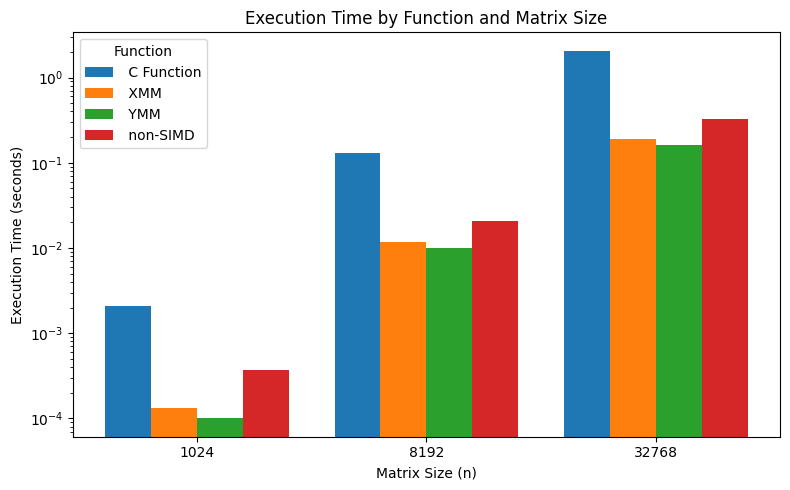

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Clean column names
df_grouped.columns = df_grouped.columns.str.strip()

functions = df_grouped['Function'].unique()
matrix_sizes = sorted(df_grouped['Matrix Size (n)'].unique())

x = np.arange(len(matrix_sizes))  # positions for matrix sizes
bar_width = 0.8 / len(functions)  # distribute bars in group

plt.figure(figsize=(8, 5))

for i, func in enumerate(functions):
    subset = df_grouped[df_grouped['Function'] == func]
    plt.bar(
        x + i * bar_width,
        subset['Execution Time (seconds)'],
        width=bar_width,
        label=func
    )

plt.xticks(x + bar_width * (len(functions) - 1) / 2, matrix_sizes)
plt.xlabel('Matrix Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.yscale('log')
plt.title('Execution Time by Function and Matrix Size')
plt.legend(title='Function')
plt.tight_layout()
plt.show()
